# PROJECT NAME HERE (to be updated)

### PROJECT SPECIFICATION
- **Data Set:** Student Performance Data Set (source: https://archive.ics.uci.edu/ml/datasets/Student+Performance)
- **Project Question:** How are each students individual final grades impacted by their family/home backgrounds, individual effort, demography, past academic records, and extra-curricular educational support?

### INTRODUCTION


**Project Background Information**

One of the most pertinent questions looming over educators heads worldwide is **what are the most important factors that determine student's ability to learn**. There exists large discrepencies in individual's grades within most schools despite most students receive=ing the same shared resources (e.g. teachers, books, etc.) within school and educational curriculum between schools. Hence, it is important that we look at other factors outside of school that may play an important role determining a student's learning ability.

Before continuing further, we need to make the assumption that grades are good indication of a student's ability to learn; reflecting their ability to understand and grasp the concepts learned in their respective subjects. Although, in reality, this assumption does not always hold, we have chosen grades as our response variable to reflect one's learning ability because it is still the standard measure used in educational institutions worldwide.


**Project Question** 

This brings us to our overarching question: **how are each students individual final grades impacted by their family/home backgrounds, individual effort, demography, past academic records, and extra-curricular educational support?** More importantly, understanding not only how, but also measuring the weight / level of impact of each variables, will potentially provide a pathway to improve student's future learning ability. 


**Dataset Description:**
The dataset is taken from two Portuguese schools ('GP' - Gabriel Pereira and 'MS' - Mousinho da Silveira) and measures several of their secondary student's attributes and their three types of grades (Portugese class grades, Math class grades, and Final grades). The student attributes that were measured include, but are not limited to, the following: school, sex, age, study time, travel time, etc. 

We understand that the given dataset only reflects two Portugese schools and is not reflective other schools worldwide (as posed in our project question), but it is indeed a good starting point as we explore answers to the question.

### PRELIMINARY EXPLORATORY DATA ANALYSIS

In [63]:
# load relevant libraries
library(tidyverse)
library(repr)
library(caret)
library(ggplot2)

In [64]:
# Demonstrate that the dataset can be read from the web into R
student_data <- read_delim("data/student-mat.csv", delim = ";")

# take a look at first 10 rows of dataset
student_data %>% head(10)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19


**Cleaning the data**

Each row of the data set represents a single student, while each column only contains one single variable and there is only one value in a single cell. The data has already been read in a tidy format and now the formation of a useful data table can begin.

In [65]:
# Summarize the data using only training data

**Relevant preliminary exploratory data analysis (visualized)**

One analysis we plan to do is analyze the impact of family relationships on the student's grades. As shown below, it seems like there is no clear distinction of grades between students with very poor and excellent family relationships. In fact, at the very first glance, the very poor family relationships seem to have the highest grade median with the lowest level or variance.

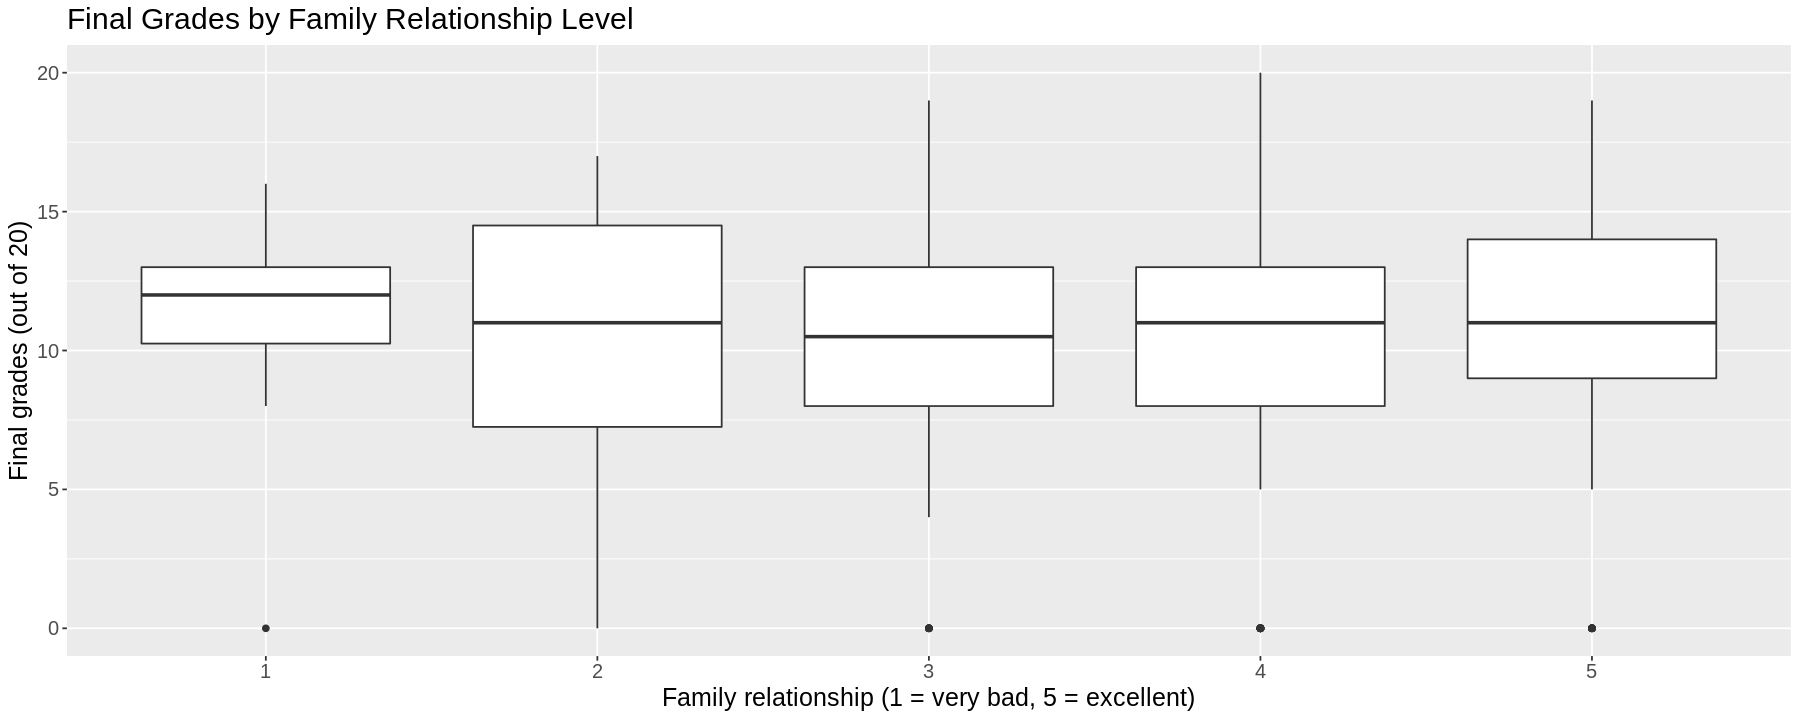

In [66]:
options(repr.plot.width=15, repr.plot.height=6)

fam_relation_grades <- ggplot(student_data, aes(x=as.factor(famrel), y=G3)) +
                            geom_boxplot() +
                            xlab("Family relationship (1 = very bad, 5 = excellent)") +
                            ylab("Final grades (out of 20)") +
                            ggtitle("Final Grades by Family Relationship Level") +
                            theme(text = element_text(size = 15))

fam_relation_grades

Additionally, one more analysis that we would like to visualize and further understand is **the impact of the student's age and their sex on their final grades.** 

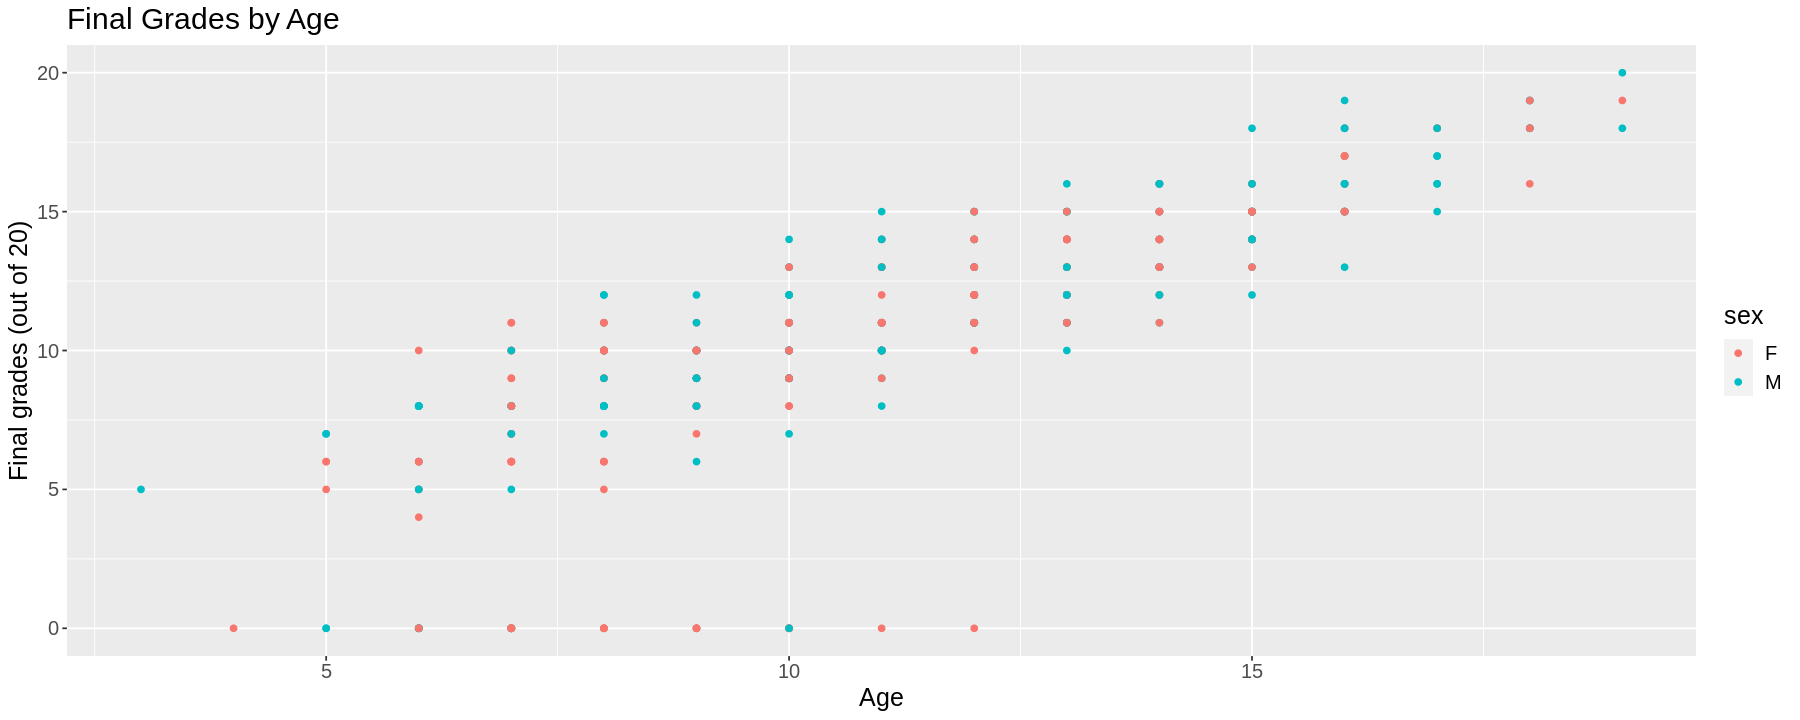

In [67]:
options(repr.plot.width=15, repr.plot.height=6)

absences_grades <- ggplot(student_data, aes(x=G1, y=G3, color=sex)) +
                            geom_point() +
                            xlab("Age") +
                            ylab("Final grades (out of 20)") +
                            ggtitle("Final Grades by Age") +
                            theme(text = element_text(size = 15))

absences_grades

### METHODS

This data analysis will focus mainly on the effect different factors in a students life, ie. their parents educational background/lively hood and their own study habits have on their final grades. Therefore, only about a third of the columns in the data set is necessary in order to understand these effects. The most pertinent factors when pursuing this analysis are those in association with family background, demographic and educational efforts of an individual. The necessary variables to trace the effects of family background would be parental educational background (Medu/Fedu), parental livelihood (Mjob/Fjob), parental marital status (Pstatus), family size and family relationships (famsize/famrel). The individuals demography would be represented by sex and age, and their educstional efforts by time spent studying (studytime), extra educational support (schoolsup) or paid classes (paid) and if the individual ha s a history of past failures (failures). The analysis of all these factors should show effects on the students final grades (G3).

- Describe at least one way that you will visualize the results

### EXPECTED OUTCOMES AND SIGNIFICANCE
**What do you expect to find?**

xx

**What impact could such findings have?**

xx

**What future questions could this lead to?**

xx